# Load libraries

In [1]:
import pandas as pd
from transformers import pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, t
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Sentiment Data


In [3]:
AAPL_normal_path = '/content/drive/MyDrive/Uni stuff/Text Mining/stock_data_detailed_analysis/AAPL_normal_bert.csv'
AAPL_sm_path = '/content/drive/MyDrive/Uni stuff/Text Mining/stock_data_detailed_analysis/AAPL_social_media_bert.csv'
AMZN_normal_path = '/content/drive/MyDrive/Uni stuff/Text Mining/stock_data_detailed_analysis/AMZN_normal_bert.csv'
AMZN_sm_path = '/content/drive/MyDrive/Uni stuff/Text Mining/stock_data_detailed_analysis/AMZN_social_media_bert.csv'
GOOGL_normal_path = '/content/drive/MyDrive/Uni stuff/Text Mining/stock_data_detailed_analysis/GOOGL_normal_bert.csv'
GOOGL_sm_path = '/content/drive/MyDrive/Uni stuff/Text Mining/stock_data_detailed_analysis/GOOGL_social_media_bert.csv'
MSFT_normal_path = '/content/drive/MyDrive/Uni stuff/Text Mining/stock_data_detailed_analysis/MSFT_normal_bert.csv'
MSFT_sm_path = '/content/drive/MyDrive/Uni stuff/Text Mining/stock_data_detailed_analysis/MSFT_social_media_bert.csv'


AAPL_normal = pd.read_csv(AAPL_normal_path)
AAPL_sm = pd.read_csv(AAPL_sm_path)
AMZN_normal = pd.read_csv(AMZN_normal_path)
AMZN_sm = pd.read_csv(AMZN_sm_path)
GOOGL_normal = pd.read_csv(GOOGL_normal_path)
GOOGL_sm = pd.read_csv(GOOGL_sm_path)
MSFT_normal = pd.read_csv(MSFT_normal_path)
MSFT_sm = pd.read_csv(MSFT_sm_path)

# Prepare the stock data

Apple

In [4]:
apple_stock_path = '/content/drive/MyDrive/Uni stuff/Text Mining/stock_data_detailed_analysis/AAPL_stock.csv'
df_apple_stock = pd.read_csv(apple_stock_path)
columns_to_delete = ['Open', 'High', 'Low', 'Close', 'Volume']
df_apple_stock = df_apple_stock.drop(columns=columns_to_delete)
df_apple_stock.head()

,Date,Adj Close
0,1980-12-12,0.406782
1,1980-12-15,0.385558
2,1980-12-16,0.357260
3,1980-12-17,0.366103
4,1980-12-18,0.376715


In [5]:
df_apple_stock['Date'] = pd.to_datetime(df_apple_stock['Date']) + pd.DateOffset(days=1)
df_apple_stock.head()

,Date,Adj Close
0,1980-12-13,0.406782
1,1980-12-16,0.385558
2,1980-12-17,0.357260
3,1980-12-18,0.366103
4,1980-12-19,0.376715


Amazon

In [6]:
amzn_stock_path = '/content/drive/MyDrive/Uni stuff/Text Mining/stock_data_detailed_analysis/AMZN_stock.csv'
df_amzn_stock = pd.read_csv(amzn_stock_path)
columns_to_delete = ['Open', 'High', 'Low', 'Close', 'Volume']
df_amzn_stock = df_amzn_stock.drop(columns=columns_to_delete)
df_amzn_stock.head()

,Date,Adj Close
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083


In [7]:
df_amzn_stock['Date'] = pd.to_datetime(df_amzn_stock['Date']) + pd.DateOffset(days=1)
df_amzn_stock.head()

,Date,Adj Close
0,1997-05-16,1.958333
1,1997-05-17,1.729167
2,1997-05-20,1.708333
3,1997-05-21,1.635417
4,1997-05-22,1.427083


Google

In [8]:
googl_stock_path = '/content/drive/MyDrive/Uni stuff/Text Mining/stock_data_detailed_analysis/GOOGL_stock.csv'
df_googl_stock = pd.read_csv(googl_stock_path)
columns_to_delete = ['Open', 'High', 'Low', 'Close', 'Volume']
df_googl_stock = df_googl_stock.drop(columns=columns_to_delete)
df_googl_stock.head()

,Date,Adj Close
0,2004-08-19,50.220219
1,2004-08-20,54.209209
2,2004-08-23,54.754753
3,2004-08-24,52.487488
4,2004-08-25,53.053055


In [9]:
df_googl_stock['Date'] = pd.to_datetime(df_googl_stock['Date']) + pd.DateOffset(days=1)
df_googl_stock.head()

,Date,Adj Close
0,2004-08-20,50.220219
1,2004-08-21,54.209209
2,2004-08-24,54.754753
3,2004-08-25,52.487488
4,2004-08-26,53.053055


Microsoft

In [10]:
msft_stock_path = '/content/drive/MyDrive/Uni stuff/Text Mining/stock_data_detailed_analysis/MSFT_stock.csv'
df_msft_stock = pd.read_csv(msft_stock_path)
columns_to_delete = ['Open', 'High', 'Low', 'Close', 'Volume']
df_msft_stock = df_msft_stock.drop(columns=columns_to_delete)
df_msft_stock.head()

,Date,Adj Close
0,1986-03-13,0.062378
1,1986-03-14,0.064606
2,1986-03-17,0.065720
3,1986-03-18,0.064049
4,1986-03-19,0.062935


In [11]:
df_msft_stock['Date'] = pd.to_datetime(df_msft_stock['Date']) + pd.DateOffset(days=1)
df_msft_stock.head()

,Date,Adj Close
0,1986-03-14,0.062378
1,1986-03-15,0.064606
2,1986-03-18,0.065720
3,1986-03-19,0.064049
4,1986-03-20,0.062935


# Merge stock dataset with sentiment Datasets

## Normal BERT model

In [12]:
def date_sentiment_label_adaptation_merge(sentiment_dataset, stock_dataset):
  #Rename "date" to "Date"
  sentiment_dataset.rename(columns={'date': 'Date'}, inplace=True)
  sentiment_dataset['Date'] = pd.to_datetime(sentiment_dataset['Date'])

  #Add sentiment label to the dataset
  for index, row in sentiment_dataset.iterrows():
    positive = row.positives
    neutral = row.neutral
    negative = row.negatives

    values = np.array([positive, neutral, negative])
    max_index = np.argmax(values)

    if max_index == 0:
      sentiment_dataset['sentiment_label'] = 'POSITIVE'
    elif max_index == 1:
      sentiment_dataset['sentiment_label'] = 'NEUTRAL'
    else:
      sentiment_dataset['sentiment_label'] = 'NEGATIVE'

  #Drop sentiment score (not necessary any more)
  df_sentiment_stocks = pd.merge(stock_dataset, sentiment_dataset, on='Date', how='inner')
  df_sentiment_stocks = df_sentiment_stocks.drop('sentiment_score', axis=1)

  #Calculate the stock market difference to the day before
  df_sentiment_stocks['Difference'] = df_sentiment_stocks['Adj Close'] - df_sentiment_stocks['Adj Close'].shift(1)
  #Delete first row as difference is nan
  df_sentiment_stocks = df_sentiment_stocks.drop(df_sentiment_stocks.index[0])
  df_sentiment_stocks = df_sentiment_stocks.reset_index(drop=True)

  return df_sentiment_stocks

Apple

In [13]:
#Normal Bert
df_sentiment_stocks_apple = date_sentiment_label_adaptation_merge(AAPL_normal, df_apple_stock)
#Social Media Bert
df_sentiment_social_media_stocks_apple = date_sentiment_label_adaptation_merge(AAPL_sm, df_apple_stock)

print(df_sentiment_stocks_apple.head())
print(df_sentiment_social_media_stocks_apple.head())

        Date   Adj Close  positives  neutral  negatives sentiment_label  \
0 2015-01-06   97.393181   0.080279      0.0   0.919721        NEGATIVE   
1 2015-01-07   97.402374   0.105130      0.0   0.894870        NEGATIVE   
2 2015-01-08   98.768150   0.086917      0.0   0.913083        NEGATIVE   
3 2015-01-09  102.563072   0.137885      0.0   0.862115        NEGATIVE   
4 2015-01-10  102.673050   0.113292      0.0   0.886708        NEGATIVE   

   Difference  
0   -2.823273  
1    0.009193  
2    1.365776  
3    3.794922  
4    0.109978  
        Date   Adj Close  positives   neutral  negatives sentiment_label  \
0 2015-01-06   97.393181   0.265502  0.627948   0.106550         NEUTRAL   
1 2015-01-07   97.402374   0.346801  0.538721   0.114478         NEUTRAL   
2 2015-01-08   98.768150   0.350733  0.560440   0.088828         NEUTRAL   
3 2015-01-09  102.563072   0.393574  0.514056   0.092369         NEUTRAL   
4 2015-01-10  102.673050   0.312221  0.614630   0.073149         NEUTRAL 

Amazon

In [14]:
#Normal Bert
df_sentiment_stocks_amzn = date_sentiment_label_adaptation_merge(AMZN_normal, df_amzn_stock)
#Social Media Bert
df_sentiment_social_media_stocks_amzn = date_sentiment_label_adaptation_merge(AMZN_sm, df_amzn_stock)

print(df_sentiment_stocks_amzn.head())
print(df_sentiment_social_media_stocks_amzn.head())

        Date   Adj Close  positives  neutral  negatives sentiment_label  \
0 2015-01-06  302.190002   0.077085      0.0   0.922915        NEGATIVE   
1 2015-01-07  295.290009   0.105376      0.0   0.894624        NEGATIVE   
2 2015-01-08  298.420013   0.084693      0.0   0.915307        NEGATIVE   
3 2015-01-09  300.459991   0.132241      0.0   0.867759        NEGATIVE   
4 2015-01-10  296.929993   0.107843      0.0   0.892157        NEGATIVE   

   Difference  
0   -6.329987  
1   -6.899994  
2    3.130005  
3    2.039978  
4   -3.529999  
        Date   Adj Close  positives   neutral  negatives sentiment_label  \
0 2015-01-06  302.190002   0.254558  0.647966   0.097475         NEUTRAL   
1 2015-01-07  295.290009   0.329986  0.554519   0.115495         NEUTRAL   
2 2015-01-08  298.420013   0.316485  0.594090   0.089425         NEUTRAL   
3 2015-01-09  300.459991   0.366511  0.538056   0.095433         NEUTRAL   
4 2015-01-10  296.929993   0.291855  0.631222   0.076923         NEUTRAL 

Googl

In [15]:
#Normal Bert
df_sentiment_stocks_googl = date_sentiment_label_adaptation_merge(GOOGL_normal, df_googl_stock)
#Social Media Bert
df_sentiment_social_media_stocks_googl = date_sentiment_label_adaptation_merge(GOOGL_sm, df_googl_stock)

print(df_sentiment_stocks_googl.head())
print(df_sentiment_social_media_stocks_googl.head())

        Date   Adj Close  positives  neutral  negatives sentiment_label  \
0 2015-01-06  519.460022   0.072622      0.0   0.927378        NEGATIVE   
1 2015-01-07  506.640015   0.091156      0.0   0.908844        NEGATIVE   
2 2015-01-08  505.149994   0.074627      0.0   0.925373        NEGATIVE   
3 2015-01-09  506.910004   0.119722      0.0   0.880278        NEGATIVE   
4 2015-01-10  500.720001   0.099929      0.0   0.900071        NEGATIVE   

   Difference  
0  -10.089966  
1  -12.820007  
2   -1.490021  
3    1.760010  
4   -6.190002  
        Date   Adj Close  positives   neutral  negatives sentiment_label  \
0 2015-01-06  519.460022   0.307413  0.601017   0.091570         NEUTRAL   
1 2015-01-07  506.640015   0.386921  0.512262   0.100817         NEUTRAL   
2 2015-01-08  505.149994   0.401849  0.516358   0.081792         NEUTRAL   
3 2015-01-09  506.910004   0.402584  0.495030   0.102386         NEUTRAL   
4 2015-01-10  500.720001   0.321199  0.605996   0.072805         NEUTRAL 

Microsoft

In [16]:
#Normal Bert
df_sentiment_stocks_msft = date_sentiment_label_adaptation_merge(MSFT_normal, df_msft_stock)
#Social Media Bert
df_sentiment_social_media_stocks_msft = date_sentiment_label_adaptation_merge(MSFT_sm, df_msft_stock)

print(df_sentiment_stocks_msft.head())
print(df_sentiment_social_media_stocks_msft.head())

        Date  Adj Close  positives  neutral  negatives sentiment_label  \
0 2015-01-06  41.479866   0.082671      0.0   0.917329        NEGATIVE   
1 2015-01-07  40.871037   0.103394      0.0   0.896606        NEGATIVE   
2 2015-01-08  41.390320   0.086367      0.0   0.913633        NEGATIVE   
3 2015-01-09  42.607944   0.135135      0.0   0.864865        NEGATIVE   
4 2015-01-10  42.249817   0.115894      0.0   0.884106        NEGATIVE   

   Difference  
0   -0.384975  
1   -0.608829  
2    0.519283  
3    1.217625  
4   -0.358128  
        Date  Adj Close  positives   neutral  negatives sentiment_label  \
0 2015-01-06  41.479866   0.274463  0.622912   0.102625         NEUTRAL   
1 2015-01-07  40.871037   0.349131  0.539494   0.111374         NEUTRAL   
2 2015-01-08  41.390320   0.356780  0.553390   0.089831         NEUTRAL   
3 2015-01-09  42.607944   0.383907  0.525799   0.090295         NEUTRAL   
4 2015-01-10  42.249817   0.312914  0.614238   0.072848         NEUTRAL   

   Diffe

# Draw Graphs

##Normalization of stock data

In [17]:
def stock_difference_normalization(df_sentiment_stocks):
  scaler = MinMaxScaler()

  # Fit and transform the selected column
  normalized_difference = scaler.fit_transform(df_sentiment_stocks["Difference"].values.reshape(-1, 1))

  # Update the DataFrame with the normalized values
  df_sentiment_stocks['Difference_normalized'] = normalized_difference

  # If you want to keep only the normalized column
  df_sentiment_stocks.drop(columns=['Difference'], inplace=True)
  df_sentiment_stocks.rename(columns={'Difference_normalized': 'Difference'}, inplace=True)

  return df_sentiment_stocks


In [18]:
df_sentiment_stocks_apple = stock_difference_normalization(df_sentiment_stocks_apple)
df_sentiment_stocks_amzn = stock_difference_normalization(df_sentiment_stocks_amzn)
df_sentiment_stocks_googl = stock_difference_normalization(df_sentiment_stocks_googl)
df_sentiment_stocks_msft = stock_difference_normalization(df_sentiment_stocks_msft)

df_sentiment_social_media_stocks_apple = stock_difference_normalization(df_sentiment_social_media_stocks_apple)
df_sentiment_social_media_stocks_amzn = stock_difference_normalization(df_sentiment_social_media_stocks_amzn)
df_sentiment_social_media_stocks_googl = stock_difference_normalization(df_sentiment_social_media_stocks_googl)
df_sentiment_social_media_stocks_msft = stock_difference_normalization(df_sentiment_social_media_stocks_msft)

## Normal BERT model

In [19]:
def illustrate_graphs_stock_to_sentiment(df_sentiment_stocks, normal_bert):
  plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

  # Plot 1
  plt.subplot(1, 3, 1)
  plt.scatter(df_sentiment_stocks["positives"], df_sentiment_stocks['Difference'], c='green', alpha=0.6)
  coefficients1 = np.polyfit(df_sentiment_stocks['positives'], df_sentiment_stocks['Difference'], 1)
  line1 = np.polyval(coefficients1, df_sentiment_stocks['positives'])
  plt.plot(df_sentiment_stocks['positives'], line1, color='green', linewidth=2)
  plt.title('Positives')

  # Plot 2
  plt.subplot(1, 3, 2)
  plt.scatter(df_sentiment_stocks["neutral"], df_sentiment_stocks["Difference"], c='blue', alpha=0.6)
  if normal_bert:
    plt.plot(df_sentiment_stocks['neutral'], color='blue', linewidth=2)
  else:
    coefficients2 = np.polyfit(df_sentiment_stocks['neutral'], df_sentiment_stocks['Difference'], 1)
    line2 = np.polyval(coefficients2, df_sentiment_stocks['neutral'])
    plt.plot(df_sentiment_stocks['neutral'], line2, color='blue', linewidth=2)
  plt.title('Neutrals')

  # Plot 3
  plt.subplot(1, 3, 3)
  plt.scatter(df_sentiment_stocks["negatives"], df_sentiment_stocks["Difference"], c='red', alpha=0.6)
  coefficients3 = np.polyfit(df_sentiment_stocks['negatives'], df_sentiment_stocks['Difference'], 1)
  line3 = np.polyval(coefficients3, df_sentiment_stocks['negatives'])
  plt.plot(df_sentiment_stocks['negatives'], line3, color='red', linewidth=2)
  plt.title('Negatives')

  plt.suptitle('Scatterplot of Negative Sentiments vs. Stock Price')

  # Adjust layout to prevent overlap
  plt.tight_layout()


  # Show the plot
  plt.show()

Apple

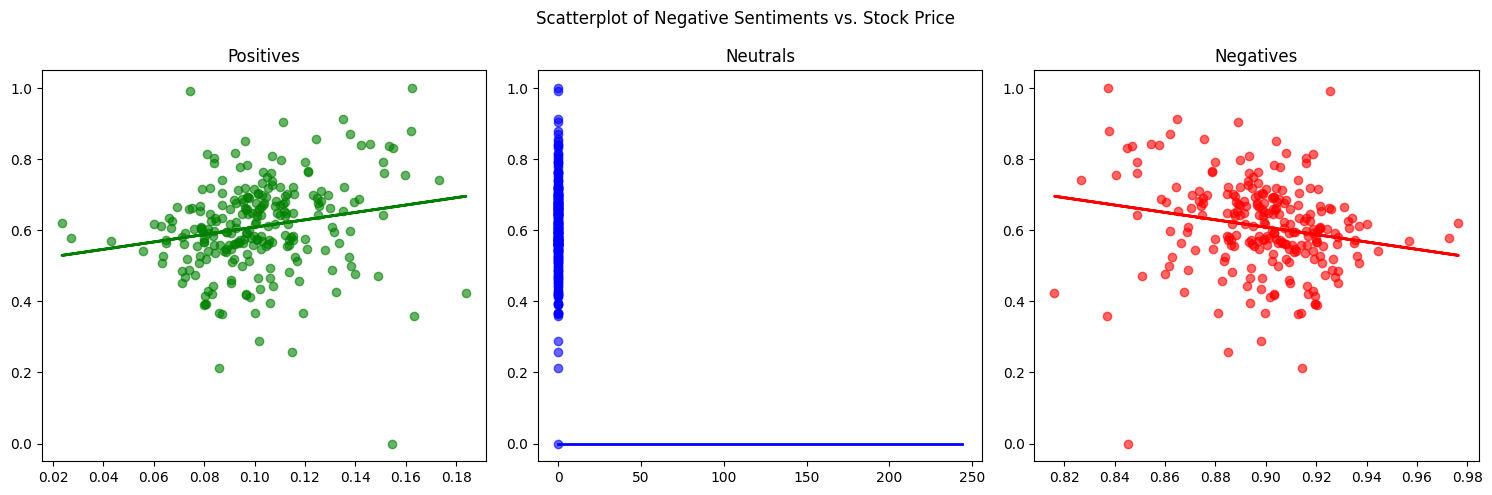

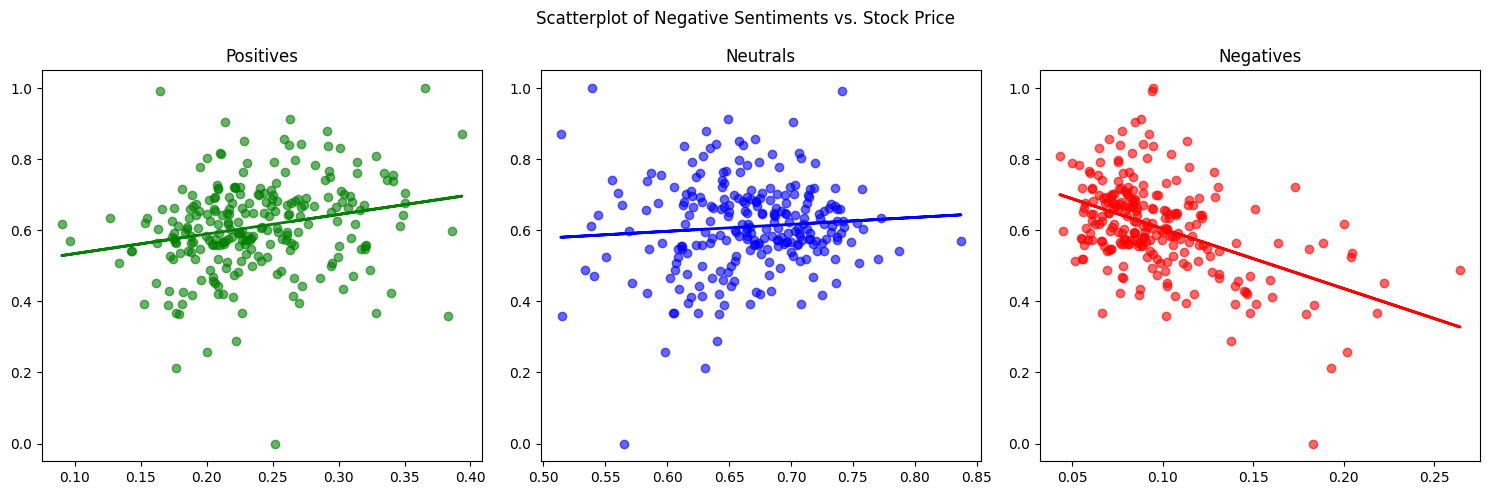

In [20]:
illustrate_graphs_stock_to_sentiment(df_sentiment_stocks_apple, True)
illustrate_graphs_stock_to_sentiment(df_sentiment_social_media_stocks_apple, False)

Amazon

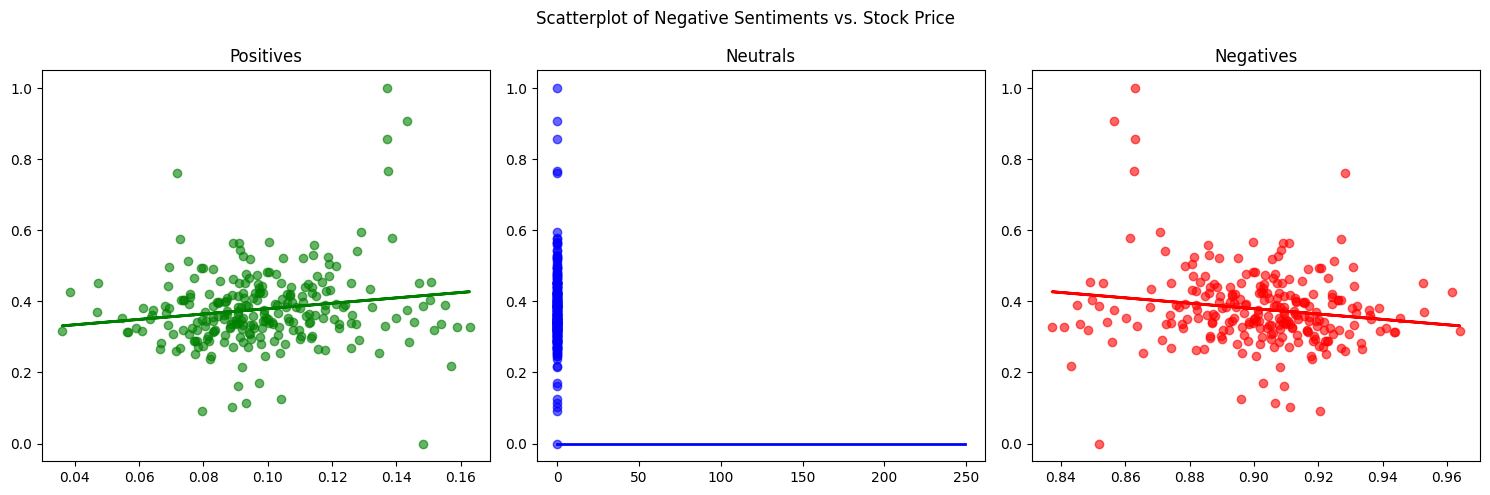

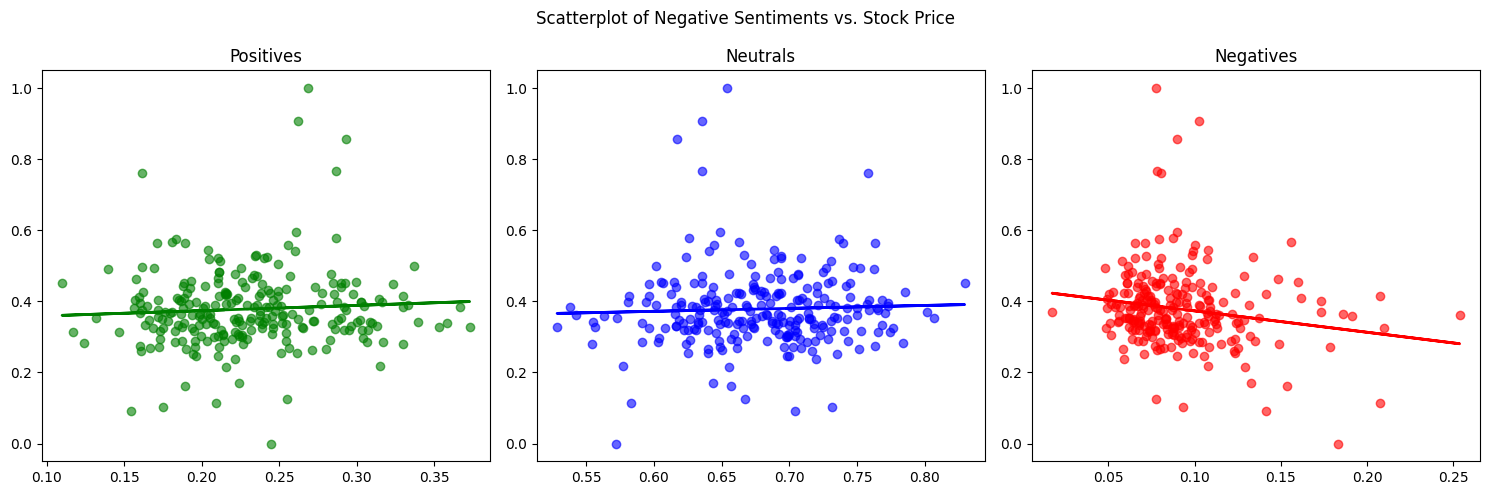

In [21]:
illustrate_graphs_stock_to_sentiment(df_sentiment_stocks_amzn, True)
illustrate_graphs_stock_to_sentiment(df_sentiment_social_media_stocks_amzn, False)

Googl

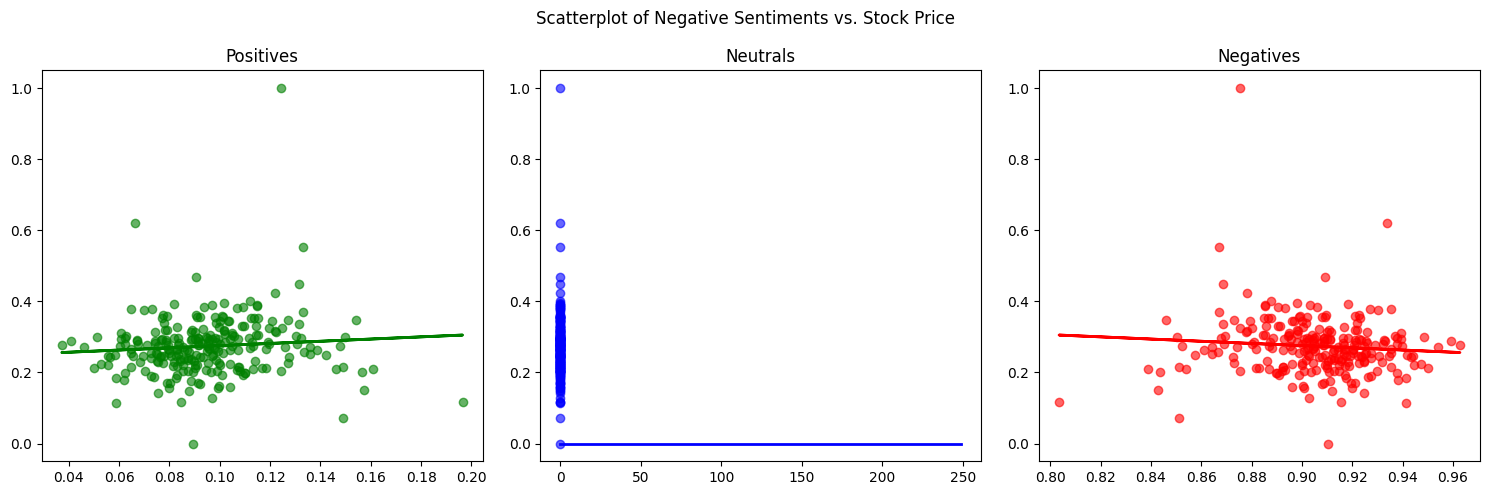

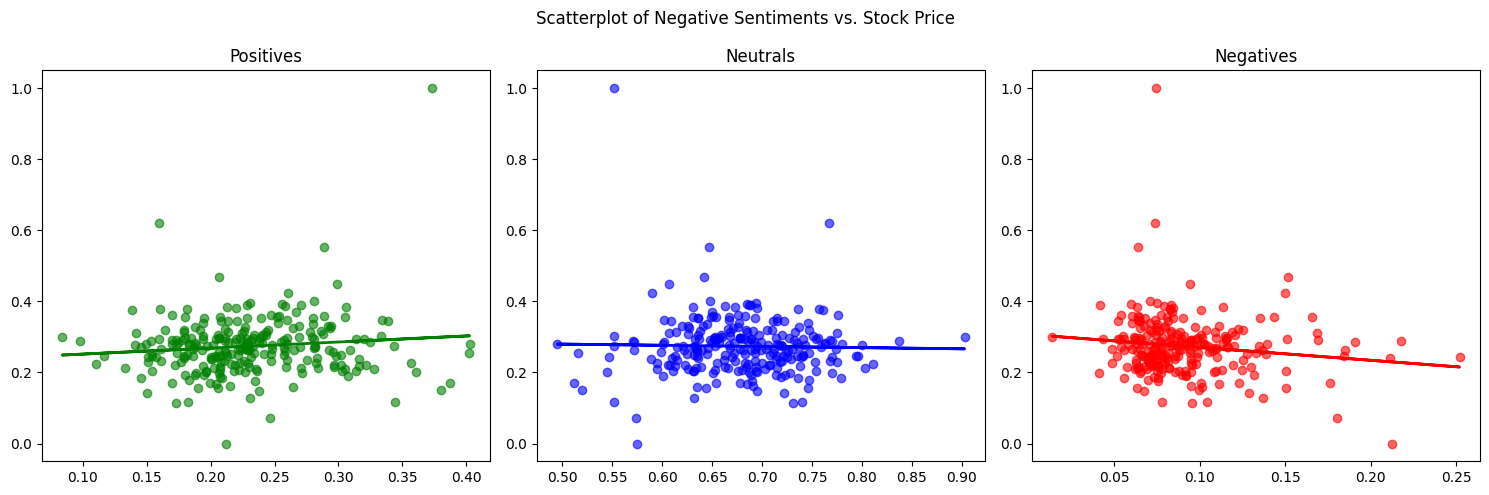

In [22]:
illustrate_graphs_stock_to_sentiment(df_sentiment_stocks_googl, True)
illustrate_graphs_stock_to_sentiment(df_sentiment_social_media_stocks_googl, False)

Microsoft

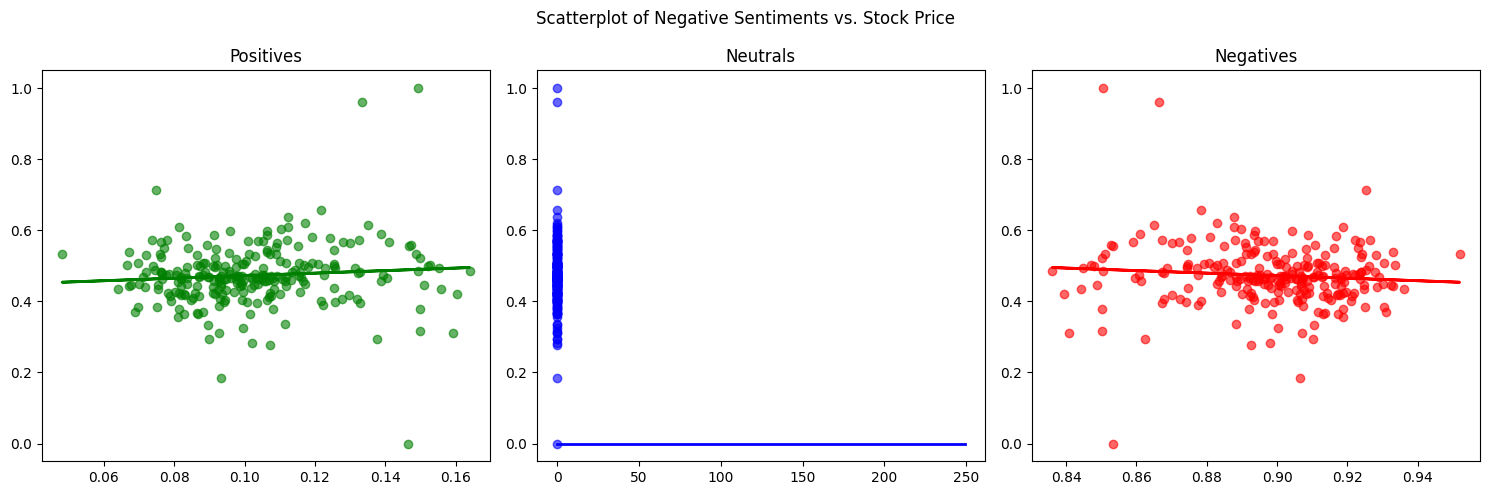

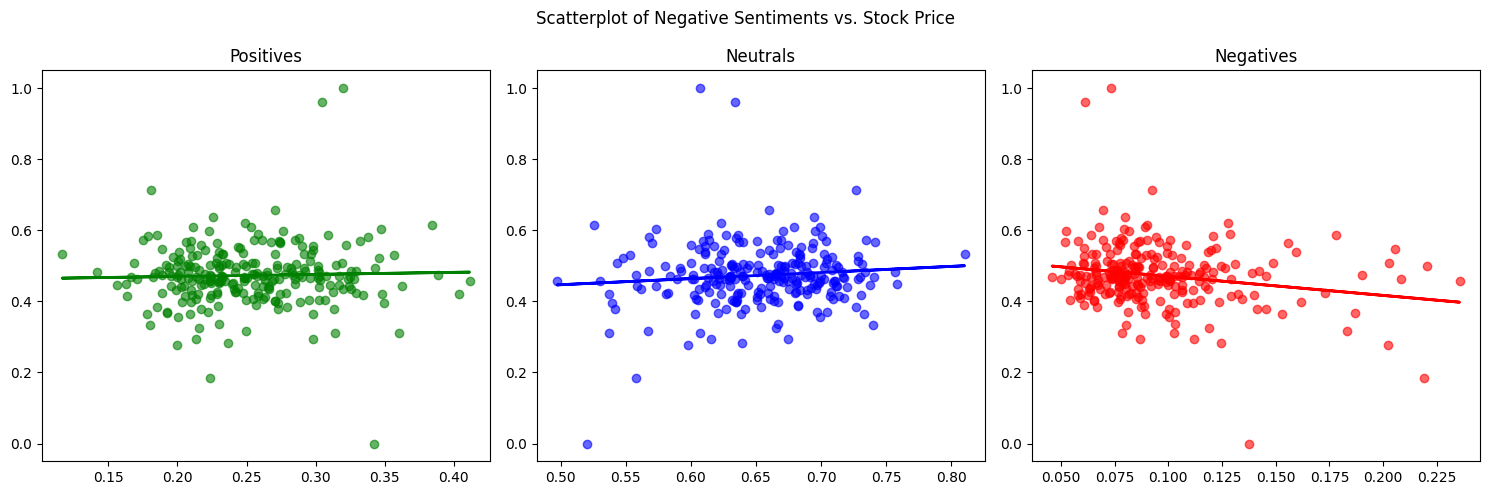

In [23]:
illustrate_graphs_stock_to_sentiment(df_sentiment_stocks_msft, True)
illustrate_graphs_stock_to_sentiment(df_sentiment_social_media_stocks_msft, False)

In [24]:
def pos_neu_neg_in_one(df_sentiment_stocks):
  plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

  plt.scatter(df_sentiment_stocks["positives"], df_sentiment_stocks["Difference"], c='green', alpha=0.6)
  plt.scatter(df_sentiment_stocks["neutral"], df_sentiment_stocks["Difference"], c='blue', alpha=0.6)
  plt.scatter(df_sentiment_stocks["negatives"], df_sentiment_stocks["Difference"], c='red', alpha=0.6)

  # Set labels and title
  plt.xlabel('Sentiments')
  plt.ylabel('Stock differences')
  plt.title('Stock differences compared to sentiments (all_classes)')

Apple

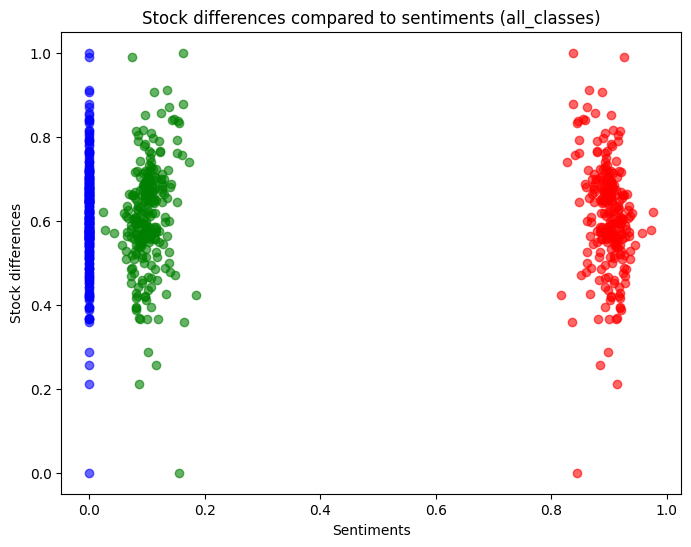

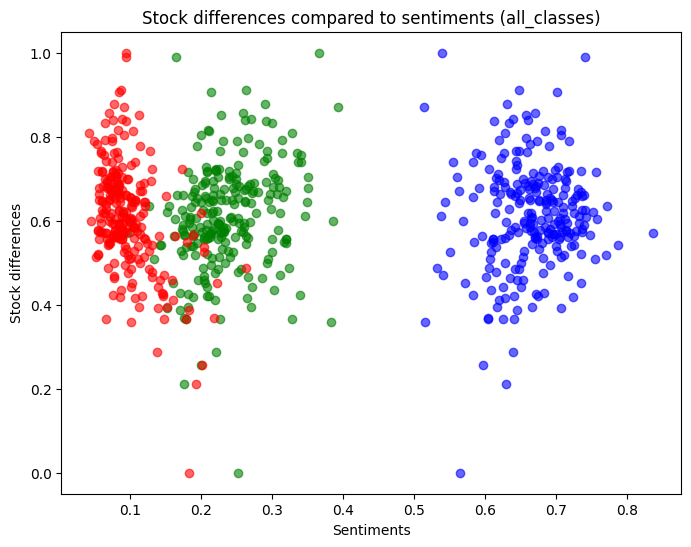

In [25]:
pos_neu_neg_in_one(df_sentiment_stocks_apple)
pos_neu_neg_in_one(df_sentiment_social_media_stocks_apple)

Amazon

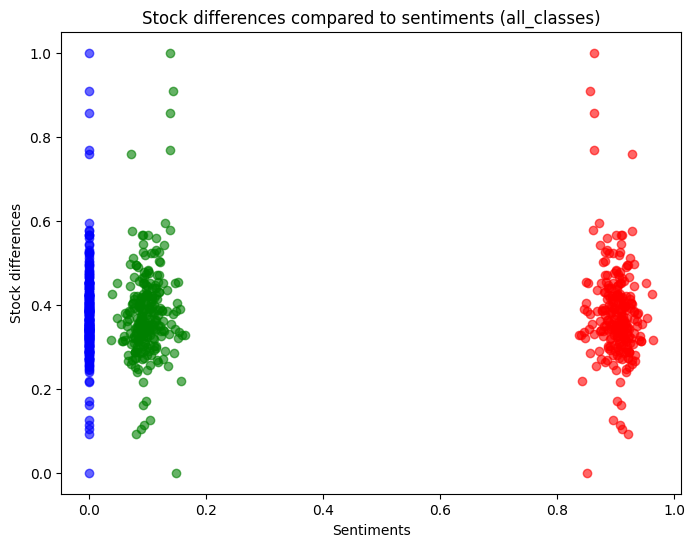

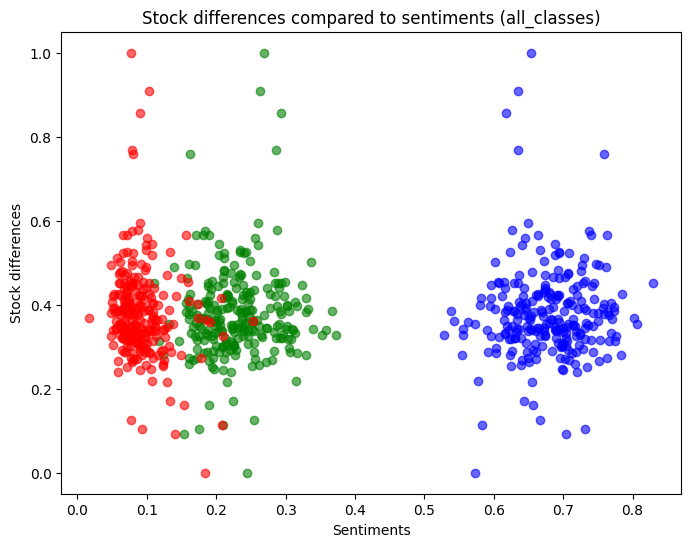

In [26]:
pos_neu_neg_in_one(df_sentiment_stocks_amzn)
pos_neu_neg_in_one(df_sentiment_social_media_stocks_amzn)

Googl

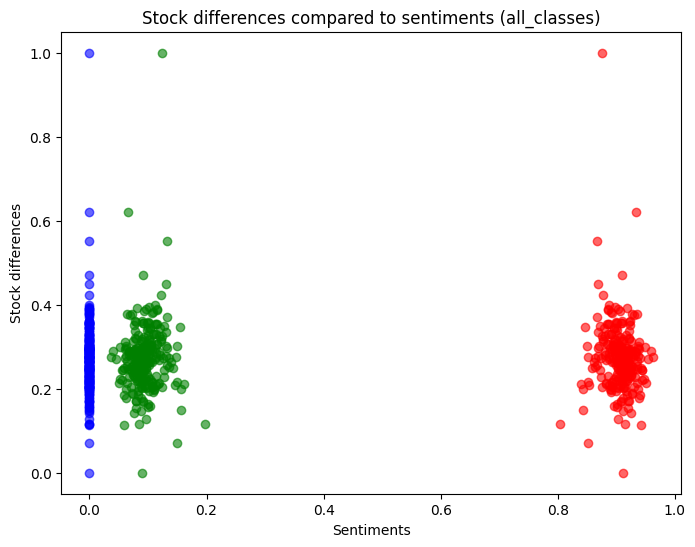

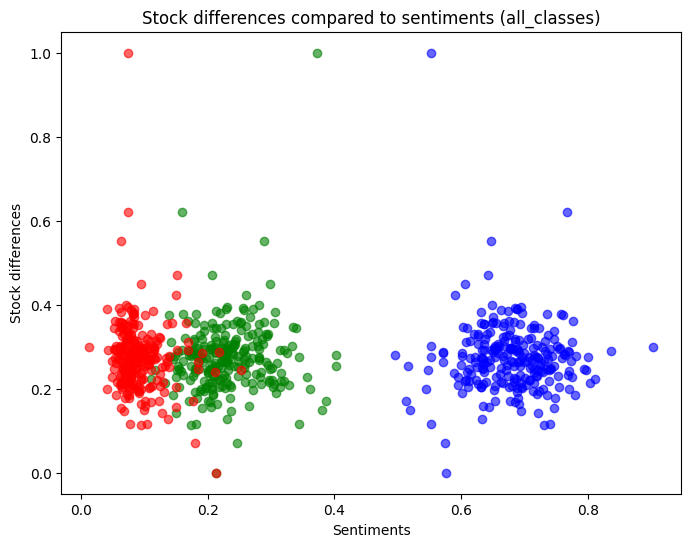

In [27]:
pos_neu_neg_in_one(df_sentiment_stocks_googl)
pos_neu_neg_in_one(df_sentiment_social_media_stocks_googl)

Microsoft

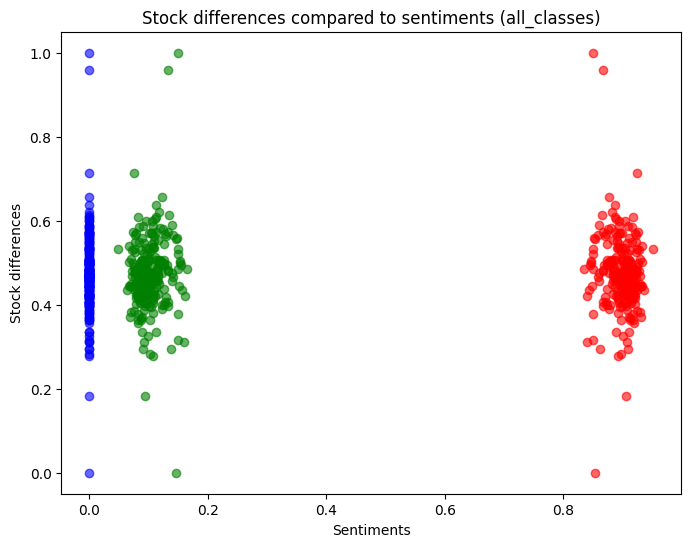

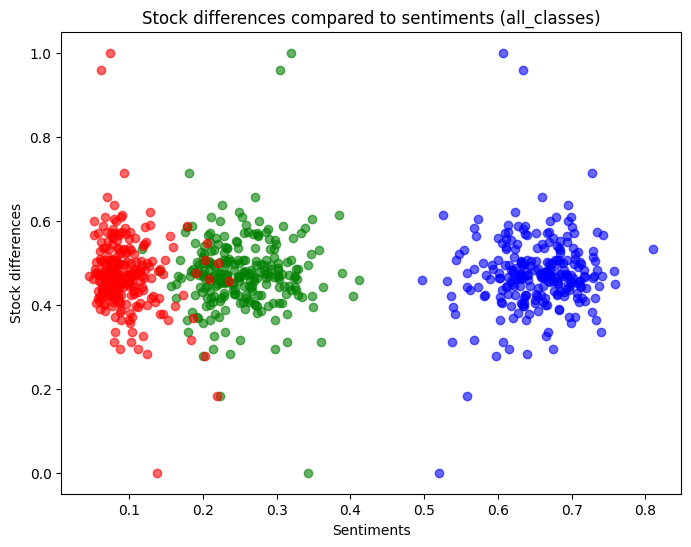

In [28]:
pos_neu_neg_in_one(df_sentiment_stocks_msft)
pos_neu_neg_in_one(df_sentiment_social_media_stocks_msft)

## Social Media specified model

# Calculating Eucledean Distance

In [29]:
def calculate_eucledean_distance(df_sentiment_stocks):
  features = df_sentiment_stocks[['positives', 'neutral', 'negatives']]
  euclidean_distances = np.linalg.norm(features, axis=1)
  df_sentiment_stocks['Euclidean_Distance'] = euclidean_distances

  return df_sentiment_stocks

Apple

In [30]:
#Normal model
calculate_eucledean_distance(df_sentiment_stocks_apple)
#Social media model
calculate_eucledean_distance(df_sentiment_social_media_stocks_apple)

,Date,Adj Close,positives,neutral,negatives,sentiment_label,Difference,Euclidean_Distance
0,2015-01-06,97.393181,0.265502,0.627948,0.106550,NEUTRAL,0.415335,0.690045
1,2015-01-07,97.402374,0.346801,0.538721,0.114478,NEUTRAL,0.610648,0.650843
2,2015-01-08,98.768150,0.350733,0.560440,0.088828,NEUTRAL,0.704191,0.667080
3,2015-01-09,102.563072,0.393574,0.514056,0.092369,NEUTRAL,0.871692,0.653978
4,2015-01-10,102.673050,0.312221,0.614630,0.073149,NEUTRAL,0.617597,0.693255
...,...,...,...,...,...,...,...,...
240,2015-12-24,101.252747,0.188876,0.713789,0.097335,NEUTRAL,0.698725,0.744744
241,2015-12-25,100.712036,0.226415,0.689727,0.083857,NEUTRAL,0.572729,0.730767
242,2015-12-29,99.584007,0.229420,0.676113,0.094467,NEUTRAL,0.532231,0.720199
243,2015-12-30,101.373940,0.252548,0.645527,0.101925,NEUTRAL,0.733438,0.700624


Amazon

In [31]:
#Normal model
calculate_eucledean_distance(df_sentiment_stocks_amzn)
#Social media model
calculate_eucledean_distance(df_sentiment_social_media_stocks_amzn)

,Date,Adj Close,positives,neutral,negatives,sentiment_label,Difference,Euclidean_Distance
0,2015-01-06,302.190002,0.254558,0.647966,0.097475,NEUTRAL,0.287322,0.702966
1,2015-01-07,295.290009,0.329986,0.554519,0.115495,NEUTRAL,0.280710,0.655531
2,2015-01-08,298.420013,0.316485,0.594090,0.089425,NEUTRAL,0.397054,0.679046
3,2015-01-09,300.459991,0.366511,0.538056,0.095433,NEUTRAL,0.384410,0.657983
4,2015-01-10,296.929993,0.291855,0.631222,0.076923,NEUTRAL,0.319800,0.699670
...,...,...,...,...,...,...,...,...
245,2015-12-24,663.700012,0.179223,0.713719,0.107058,NEUTRAL,0.367127,0.743625
246,2015-12-25,662.789978,0.200000,0.716340,0.083660,NEUTRAL,0.350191,0.748426
247,2015-12-29,675.200012,0.249033,0.672080,0.078886,NEUTRAL,0.504698,0.721064
248,2015-12-30,693.969971,0.286935,0.625763,0.087302,NEUTRAL,0.578471,0.693926


Googl

In [32]:
#Normal model
calculate_eucledean_distance(df_sentiment_stocks_googl)
#Social media model
calculate_eucledean_distance(df_sentiment_social_media_stocks_googl)

,Date,Adj Close,positives,neutral,negatives,sentiment_label,Difference,Euclidean_Distance
0,2015-01-06,519.460022,0.307413,0.601017,0.091570,NEUTRAL,0.190262,0.681256
1,2015-01-07,506.640015,0.386921,0.512262,0.100817,NEUTRAL,0.169780,0.649834
2,2015-01-08,505.149994,0.401849,0.516358,0.081792,NEUTRAL,0.254782,0.659393
3,2015-01-09,506.910004,0.402584,0.495030,0.102386,NEUTRAL,0.279166,0.646229
4,2015-01-10,500.720001,0.321199,0.605996,0.072805,NEUTRAL,0.219521,0.689710
...,...,...,...,...,...,...,...,...
245,2015-12-24,768.510010,0.183178,0.716822,0.100000,NEUTRAL,0.276315,0.746585
246,2015-12-25,765.840027,0.207071,0.715488,0.077441,NEUTRAL,0.245930,0.748865
247,2015-12-29,782.239990,0.228261,0.688735,0.083004,NEUTRAL,0.389001,0.730307
248,2015-12-30,793.960022,0.280229,0.635621,0.084150,NEUTRAL,0.353890,0.699731


Microsoft

In [33]:
#Normal model
calculate_eucledean_distance(df_sentiment_stocks_msft)
#Social media model
calculate_eucledean_distance(df_sentiment_social_media_stocks_msft)

,Date,Adj Close,positives,neutral,negatives,sentiment_label,Difference,Euclidean_Distance
0,2015-01-06,41.479866,0.274463,0.622912,0.102625,NEUTRAL,0.422029,0.688390
1,2015-01-07,40.871037,0.349131,0.539494,0.111374,NEUTRAL,0.395110,0.652189
2,2015-01-08,41.390320,0.356780,0.553390,0.089831,NEUTRAL,0.530765,0.664531
3,2015-01-09,42.607944,0.383907,0.525799,0.090295,NEUTRAL,0.614739,0.657268
4,2015-01-10,42.249817,0.312914,0.614238,0.072848,NEUTRAL,0.425257,0.693189
...,...,...,...,...,...,...,...,...
245,2015-12-24,51.336910,0.201681,0.704832,0.093487,NEUTRAL,0.520300,0.739056
246,2015-12-25,51.198963,0.230347,0.681901,0.087751,NEUTRAL,0.451734,0.725086
247,2015-12-29,51.456482,0.230140,0.684579,0.085280,NEUTRAL,0.499288,0.727246
248,2015-12-30,52.008289,0.247655,0.652908,0.099437,NEUTRAL,0.534676,0.705344


# Calculation Of Pearson Coefficient

Calculation of the linear relationship between the euclidean distance and the stock difference

## Normal Bert Model

In [34]:
def calculate_pearson_coeff(df_sentiment_stocks):
  pearson_corr, p_value = pearsonr(df_sentiment_stocks['Euclidean_Distance'], df_sentiment_stocks['Difference'], alternative = 'two-sided')
  print(f"Pearson Correlation Coefficient: {pearson_corr}")
  print(f"P-value: {p_value}")

### Check with only positives, neutrals and negatives

In [35]:
def calculate_pearson_coeff_on_sentiment_individually(df_sentiment_stocks):
  pearson_corr_pos, p_value_pos = pearsonr(df_sentiment_stocks['positives'], df_sentiment_stocks['Difference'], alternative = 'greater')
  print(f"Pearson Correlation Coefficient on positives only: {pearson_corr_pos}")
  print(f"P-value on positives only: {p_value_pos}")
  pearson_corr_neu, p_value_neu = pearsonr(df_sentiment_stocks['neutral'], df_sentiment_stocks['Difference'], alternative = 'two-sided')
  print(f"Pearson Correlation Coefficient on neutrals only: {pearson_corr_neu}")
  print(f"P-value on neutral only: {p_value_neu}")
  pearson_corr_neg, p_value_neg = pearsonr(df_sentiment_stocks['negatives'], df_sentiment_stocks['Difference'], alternative = 'less')
  print(f"Pearson Correlation Coefficient on negatives only: {pearson_corr_neg}")
  print(f"P-value on negatives only: {p_value_neg}")

Apple

In [36]:
#Normal model
calculate_pearson_coeff(df_sentiment_stocks_apple)
calculate_pearson_coeff_on_sentiment_individually(df_sentiment_stocks_apple)
#Social media model
calculate_pearson_coeff(df_sentiment_social_media_stocks_apple)
calculate_pearson_coeff_on_sentiment_individually(df_sentiment_social_media_stocks_apple)

Pearson Correlation Coefficient: -0.1935790301904874
P-value: 0.002339724672831589
Pearson Correlation Coefficient on positives only: 0.19339212462608357
P-value on positives only: 0.001181560621329509
Pearson Correlation Coefficient on neutrals only: nan
P-value on neutral only: nan
Pearson Correlation Coefficient on negatives only: -0.19339212462608363
P-value on negatives only: 0.001181560621329495
Pearson Correlation Coefficient: 0.15905049835672774
P-value: 0.0126779392303997
Pearson Correlation Coefficient on positives only: 0.22637542905006713
P-value on positives only: 0.00017734052728283342
Pearson Correlation Coefficient on neutrals only: 0.07981264790387706
P-value on neutral only: 0.21318190802425802
Pearson Correlation Coefficient on negatives only: -0.4600104475501406
P-value on negatives only: 1.5580833266842573e-14


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Amazon

In [37]:
#Normal model
calculate_pearson_coeff(df_sentiment_stocks_amzn)
calculate_pearson_coeff_on_sentiment_individually(df_sentiment_stocks_amzn)
#Social media model
calculate_pearson_coeff(df_sentiment_social_media_stocks_amzn)
calculate_pearson_coeff_on_sentiment_individually(df_sentiment_social_media_stocks_amzn)

Pearson Correlation Coefficient: -0.15581347112288763
P-value: 0.013649305741190896
Pearson Correlation Coefficient on positives only: 0.1559503708617009
P-value on positives only: 0.006782960946438744
Pearson Correlation Coefficient on neutrals only: nan
P-value on neutral only: nan
Pearson Correlation Coefficient on negatives only: -0.15595037086170083
P-value on negatives only: 0.006782960946438824
Pearson Correlation Coefficient: 0.05765453273045902
P-value: 0.36399179695457967
Pearson Correlation Coefficient on positives only: 0.06637179144439952
P-value on positives only: 0.1479366274498974
Pearson Correlation Coefficient on neutrals only: 0.04087106066062946
P-value on neutral only: 0.5200564056412814
Pearson Correlation Coefficient on negatives only: -0.1737305766213878
P-value on negatives only: 0.0029424212686642156


Google

In [38]:
#Normal model
calculate_pearson_coeff(df_sentiment_stocks_googl)
calculate_pearson_coeff_on_sentiment_individually(df_sentiment_stocks_googl)
#Social media model
calculate_pearson_coeff(df_sentiment_social_media_stocks_googl)
calculate_pearson_coeff_on_sentiment_individually(df_sentiment_social_media_stocks_googl)

Pearson Correlation Coefficient: -0.09078221196503262
P-value: 0.15238549212250369
Pearson Correlation Coefficient on positives only: 0.08628048411052823
P-value on positives only: 0.08692846024718294
Pearson Correlation Coefficient on neutrals only: nan
P-value on neutral only: nan
Pearson Correlation Coefficient on negatives only: -0.08628048411052816
P-value on negatives only: 0.08692846024718484
Pearson Correlation Coefficient: -0.0011643951714143358
P-value: 0.9853848135277926
Pearson Correlation Coefficient on positives only: 0.11132729330458767
P-value on positives only: 0.03946889503273212
Pearson Correlation Coefficient on neutrals only: -0.023981097633339492
P-value on neutral only: 0.7059295150652474
Pearson Correlation Coefficient on negatives only: -0.1419660006887635
P-value on negatives only: 0.012390103139687702


Microsoft

In [39]:
#Normal model
calculate_pearson_coeff(df_sentiment_stocks_msft)
calculate_pearson_coeff_on_sentiment_individually(df_sentiment_stocks_msft)
#Social media model
calculate_pearson_coeff(df_sentiment_social_media_stocks_msft)
calculate_pearson_coeff_on_sentiment_individually(df_sentiment_social_media_stocks_msft)

Pearson Correlation Coefficient: -0.08790472894042677
P-value: 0.1658648077228246
Pearson Correlation Coefficient on positives only: 0.08780355106267729
P-value on positives only: 0.08317724467780735
Pearson Correlation Coefficient on neutrals only: nan
P-value on neutral only: nan
Pearson Correlation Coefficient on negatives only: -0.0878035510626773
P-value on negatives only: 0.08317724467780735
Pearson Correlation Coefficient: 0.1267394089901693
P-value: 0.04528868198635105
Pearson Correlation Coefficient on positives only: 0.03259811444769451
P-value on positives only: 0.3039844913984336
Pearson Correlation Coefficient on neutrals only: 0.09800370872101852
P-value on neutral only: 0.12221769981977969
Pearson Correlation Coefficient on negatives only: -0.19969260189687893
P-value on negatives only: 0.0007527552092866616


## Build a Linear Regression model and calculate the mse

generate train and test datasets

In [46]:
np.random.seed(42)

In [60]:
def calculate_mse_euclidean_distance(df_sentiment_stocks):
  features = features = df_sentiment_stocks['Euclidean_Distance'].values.reshape(-1, 1)
  target = df_sentiment_stocks['Difference']

  x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

  # Fit linear regression model
  model = LinearRegression()
  mean_x_train = np.mean(x_train)
  mean_x_train_arr = np.full(len(x_test), mean_x_train)
  model.fit(x_train, y_train)

  prediction = model.predict(x_test).reshape(-1, 1)
  mse_result = mean_squared_error(y_test, prediction)
  mse_result_mean = mean_squared_error(y_test, mean_x_train_arr)

  print("/////////////////////////////////////////////")
  print("Mean Squared Error euclidean distance:", mse_result)
  print("Mean Squared Error euclidean distance mean:", mse_result_mean)
  return mse_result


In [61]:
def calculate_mse_individually(df_sentiment_stocks):
  features_pos = features = df_sentiment_stocks['positives'].values.reshape(-1, 1)
  features_neu = features = df_sentiment_stocks['neutral'].values.reshape(-1, 1)
  features_neg = features = df_sentiment_stocks['negatives'].values.reshape(-1, 1)
  target = df_sentiment_stocks['Difference']


  x_train_pos, x_test_pos, y_train_pos, y_test_pos = train_test_split(features_pos, target, test_size=0.2, random_state=42)
  x_train_neu, x_test_neu, y_train_neu, y_test_neu = train_test_split(features_neu, target, test_size=0.2, random_state=42)
  x_train_neg, x_test_neg, y_train_neg, y_test_neg = train_test_split(features_neg, target, test_size=0.2, random_state=42)

  # Fit linear regression model
  model_pos = LinearRegression()
  model_neu = LinearRegression()
  model_neg = LinearRegression()
  model_pos.fit(x_train_pos, y_train_pos)
  model_neu.fit(x_train_neu, y_train_neu)
  model_neg.fit(x_train_neg, y_train_neg)

  mean_x_train_pos = np.mean(x_train_pos)
  mean_x_train_neu = np.mean(x_train_neu)
  mean_x_train_neg = np.mean(x_train_neg)
  mean_x_train_pos_arr = np.full(len(x_test_pos), mean_x_train_pos)
  mean_x_train_neu_arr = np.full(len(x_test_neu), mean_x_train_neu)
  mean_x_train_neg_arr = np.full(len(x_test_neg), mean_x_train_neg)

  prediction_pos = model_pos.predict(x_test_pos).reshape(-1, 1)
  prediction_neu = model_neu.predict(x_test_neu).reshape(-1, 1)
  prediction_neg = model_neg.predict(x_test_neg).reshape(-1, 1)
  mse_result_pos = mean_squared_error(y_test_pos, prediction_pos)
  mse_result_neu = mean_squared_error(y_test_neu, prediction_neu)
  mse_result_neg = mean_squared_error(y_test_neg, prediction_neg)
  mse_result_pos_mean = mean_squared_error(y_test_pos, mean_x_train_pos_arr)
  mse_result_neu_mean = mean_squared_error(y_test_neu, mean_x_train_neu_arr)
  mse_result_neg_mean = mean_squared_error(y_test_neg, mean_x_train_neg_arr)

  print("/////////////////////////////////////////////")
  print("Mean Squared Error positives:", mse_result_pos)
  print("Mean Squared Error neutral:", mse_result_neu)
  print("Mean Squared Error negatives:", mse_result_neg)
  print("---------------------------------------------")
  print("Mean Squared Error positives mean:", mse_result_pos_mean)
  print("Mean Squared Error neutral mean:", mse_result_neu_mean)
  print("Mean Squared Error negatives mean:", mse_result_neg_mean)


  return mse_result_pos, mse_result_neu, mse_result_neg


Apple

In [63]:
#Normal model
calculate_mse_euclidean_distance(df_sentiment_stocks_apple)
calculate_mse_individually(df_sentiment_stocks_apple)
#Social media model
calculate_mse_euclidean_distance(df_sentiment_social_media_stocks_apple)
calculate_mse_individually(df_sentiment_social_media_stocks_apple)

/////////////////////////////////////////////
Mean Squared Error euclidean distance: 0.023659224020142647
Mean Squared Error euclidean distance mean: 0.10941847576155438
/////////////////////////////////////////////
Mean Squared Error positives: 0.023671261141670636
Mean Squared Error neutral: 0.023399666684949465
Mean Squared Error negatives: 0.02367126114167064
---------------------------------------------
Mean Squared Error positives mean: 0.28595452000623844
Mean Squared Error neutral mean: 0.39854273560344644
Mean Squared Error negatives mean: 0.10599762670401186
/////////////////////////////////////////////
Mean Squared Error euclidean distance: 0.022518220041229803
Mean Squared Error euclidean distance mean: 0.03433744640269386
/////////////////////////////////////////////
Mean Squared Error positives: 0.02191170346297002
Mean Squared Error neutral: 0.02318852581837934
Mean Squared Error negatives: 0.016496904820037822
---------------------------------------------
Mean Squared E

(0.02191170346297002, 0.02318852581837934, 0.016496904820037822)

Amazon

In [64]:
#Normal model
calculate_mse_euclidean_distance(df_sentiment_stocks_amzn)
calculate_mse_individually(df_sentiment_stocks_amzn)
#Social media model
calculate_mse_euclidean_distance(df_sentiment_social_media_stocks_amzn)
calculate_mse_individually(df_sentiment_social_media_stocks_amzn)

/////////////////////////////////////////////
Mean Squared Error euclidean distance: 0.013775075171319795
Mean Squared Error euclidean distance mean: 0.2985035835711151
/////////////////////////////////////////////
Mean Squared Error positives: 0.01382729646013573
Mean Squared Error neutral: 0.013454326642706993
Mean Squared Error negatives: 0.013827296460135726
---------------------------------------------
Mean Squared Error positives mean: 0.08959718595676373
Mean Squared Error neutral mean: 0.153180368084336
Mean Squared Error negatives mean: 0.2925364100141605
/////////////////////////////////////////////
Mean Squared Error euclidean distance: 0.013340710256661862
Mean Squared Error euclidean distance mean: 0.13661184496970036
/////////////////////////////////////////////
Mean Squared Error positives: 0.013597661630967877
Mean Squared Error neutral: 0.013409435046663871
Mean Squared Error negatives: 0.0127901276985321
---------------------------------------------
Mean Squared Error

(0.013597661630967877, 0.013409435046663871, 0.0127901276985321)

Google

In [65]:
#Normal model
calculate_mse_euclidean_distance(df_sentiment_stocks_googl)
calculate_mse_individually(df_sentiment_stocks_googl)
#Social media model
calculate_mse_euclidean_distance(df_sentiment_social_media_stocks_googl)
calculate_mse_individually(df_sentiment_social_media_stocks_googl)

/////////////////////////////////////////////
Mean Squared Error euclidean distance: 0.006853315475937245
Mean Squared Error euclidean distance mean: 0.42986887152253145
/////////////////////////////////////////////
Mean Squared Error positives: 0.0069255994969962134
Mean Squared Error neutral: 0.005962487541797454
Mean Squared Error negatives: 0.006925599496996211
---------------------------------------------
Mean Squared Error positives mean: 0.033242983564401786
Mean Squared Error neutral mean: 0.07324681685782802
Mean Squared Error negatives mean: 0.42315500853140675
/////////////////////////////////////////////
Mean Squared Error euclidean distance: 0.006207279112283778
Mean Squared Error euclidean distance mean: 0.22251831242677278
/////////////////////////////////////////////
Mean Squared Error positives: 0.006489559850455159
Mean Squared Error neutral: 0.006395904998150593
Mean Squared Error negatives: 0.0056147334973012985
---------------------------------------------
Mean Squ

(0.006489559850455159, 0.006395904998150593, 0.0056147334973012985)

Microsoft

In [66]:
#Normal model
calculate_mse_euclidean_distance(df_sentiment_stocks_msft)
calculate_mse_individually(df_sentiment_stocks_msft)
#Social media model
calculate_mse_euclidean_distance(df_sentiment_social_media_stocks_msft)
calculate_mse_individually(df_sentiment_social_media_stocks_msft)

/////////////////////////////////////////////
Mean Squared Error euclidean distance: 0.01162070424861508
Mean Squared Error euclidean distance mean: 0.21077584675520197
/////////////////////////////////////////////
Mean Squared Error positives: 0.011677787643089294
Mean Squared Error neutral: 0.010076924768896954
Mean Squared Error negatives: 0.01167778764308929
---------------------------------------------
Mean Squared Error positives mean: 0.13547954912046575
Mean Squared Error neutral mean: 0.21768845346723886
Mean Squared Error negatives mean: 0.20541832843267296
/////////////////////////////////////////////
Mean Squared Error euclidean distance: 0.00989304205535544
Mean Squared Error euclidean distance mean: 0.07402845745287283
/////////////////////////////////////////////
Mean Squared Error positives: 0.010950798531970974
Mean Squared Error neutral: 0.010283607363221708
Mean Squared Error negatives: 0.009410061347863114
---------------------------------------------
Mean Squared E

(0.010950798531970974, 0.010283607363221708, 0.009410061347863114)